# PRODIGY TASK 3

# IMPORT LIBRARIES

In [26]:
import pandas as pd
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob

In [15]:
pip install textblob


Defaulting to user installation because normal site-packages is not writeable
                                              0.0/626.3 kB ? eta -:--:--
     --                                    41.0/626.3 kB 991.0 kB/s eta 0:00:01
     -----                                   92.2/626.3 kB 1.1 MB/s eta 0:00:01
     ------------                           204.8/626.3 kB 1.6 MB/s eta 0:00:01
     ----------------                       276.5/626.3 kB 1.5 MB/s eta 0:00:01
     ----------------                       276.5/626.3 kB 1.5 MB/s eta 0:00:01
     ----------------                       276.5/626.3 kB 1.5 MB/s eta 0:00:01
     ---------------------                  358.4/626.3 kB 1.1 MB/s eta 0:00:01
     -----------------------------          491.5/626.3 kB 1.3 MB/s eta 0:00:01
     -----------------------------------    583.7/626.3 kB 1.5 MB/s eta 0:00:01
     -------------------------------------- 626.3/626.3 kB 1.5 MB/s eta 0:00:00
                                              0.0

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


# LOAD THE DATASET

In [2]:
df=pd.read_csv(r"C:\Users\sandhiya\Desktop\prodigy tasks\twitter_training.csv")
df

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...
...,...,...,...,...
74676,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74677,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74678,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74679,9200,Nvidia,Positive,Just realized between the windows partition of...


In [5]:
# Perform sentiment analysis
def get_sentiment(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0:
        return 'positive'
    elif analysis.sentiment.polarity == 0:
        return 'neutral'
    else:
        return 'negative'

In [24]:
# Drop rows with NaN values in the text column
df = df.dropna(subset=['im getting on borderlands and i will murder you all ,'])

# Perform sentiment analysis
def get_sentiment(text):
    if isinstance(text, str):  # Check if text is a string
        analysis = TextBlob(text)
        if analysis.sentiment.polarity > 0:
            return 'positive'
        elif analysis.sentiment.polarity == 0:
            return 'neutral'
        else:
            return 'negative'
    else:
        return 'unknown'  # Handle non-string values (e.g., NaN)

# Apply sentiment analysis
df['Sentiment'] = df['im getting on borderlands and i will murder you all ,'].apply(get_sentiment)

# Display the sentiment analysis results
print(df['Sentiment'].value_counts())

positive    34082
negative    21352
neutral     18561
Name: Sentiment, dtype: int64


In [22]:
df.columns

Index(['2401', 'Borderlands', 'Positive',
       'im getting on borderlands and i will murder you all ,'],
      dtype='object')

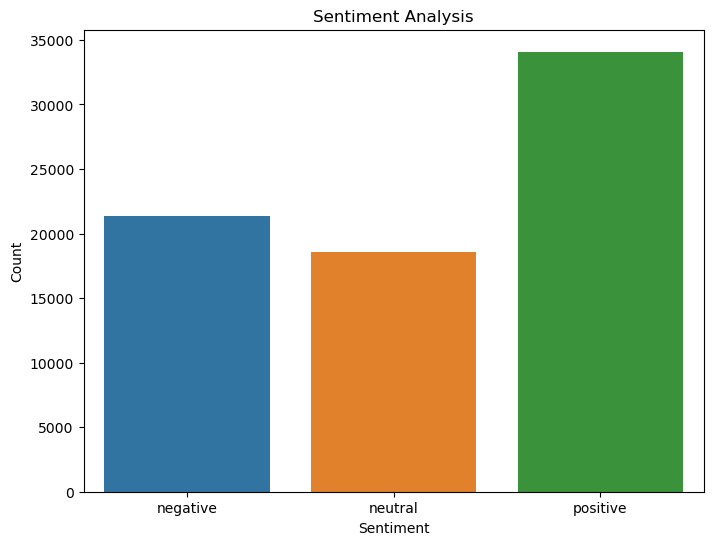

In [27]:
# Analyze sentiment patterns
sentiment_counts = df['Sentiment'].value_counts()

# Visualize sentiment patterns
plt.figure(figsize=(8, 6))
sns.countplot(x='Sentiment', data=df, order=['negative', 'neutral', 'positive'])
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()